 Machine Learning for Classification

Step 1: Break data into features and targets, and train and test sets

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('processed_data.csv', index_col='customerID')
df

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,PhoneService_No,PhoneService_Yes,tenure,MonthlyCharges,TotalCharges,Churn,TotalCharges_to_MonthlyCharges_ratio
customerID,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,0,1,0,1,29.85,29.85,0,1.000000
5575-GNVDE,0,0,0,1,0,1,0,0,1,34,56.95,1889.50,0,33.178227
3668-QPYBK,0,0,0,1,1,0,0,0,1,2,53.85,108.15,1,2.008357
7795-CFOCW,1,0,0,0,0,1,0,1,0,45,42.30,1840.75,0,43.516548
9237-HQITU,0,0,1,0,1,0,0,0,1,2,70.70,151.65,1,2.144979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,0,0,1,0,1,0,0,1,24,84.80,1990.50,0,23.472877
2234-XADUH,0,1,0,0,0,1,0,0,1,72,103.20,7362.90,0,71.345930
4801-JZAZL,0,0,1,0,1,0,0,1,0,11,29.60,346.45,0,11.704392


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   PaymentMethod_Bank transfer (automatic)  7043 non-null   int64  
 1   PaymentMethod_Credit card (automatic)    7043 non-null   int64  
 2   PaymentMethod_Electronic check           7043 non-null   int64  
 3   PaymentMethod_Mailed check               7043 non-null   int64  
 4   Contract_Month-to-month                  7043 non-null   int64  
 5   Contract_One year                        7043 non-null   int64  
 6   Contract_Two year                        7043 non-null   int64  
 7   PhoneService_No                          7043 non-null   int64  
 8   PhoneService_Yes                         7043 non-null   int64  
 9   tenure                                   7043 non-null   int64  
 10  MonthlyCharges                        

create features and targets again, as well as train and test sets.

In [10]:
features = df.drop('Churn', axis=1)
targets = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)

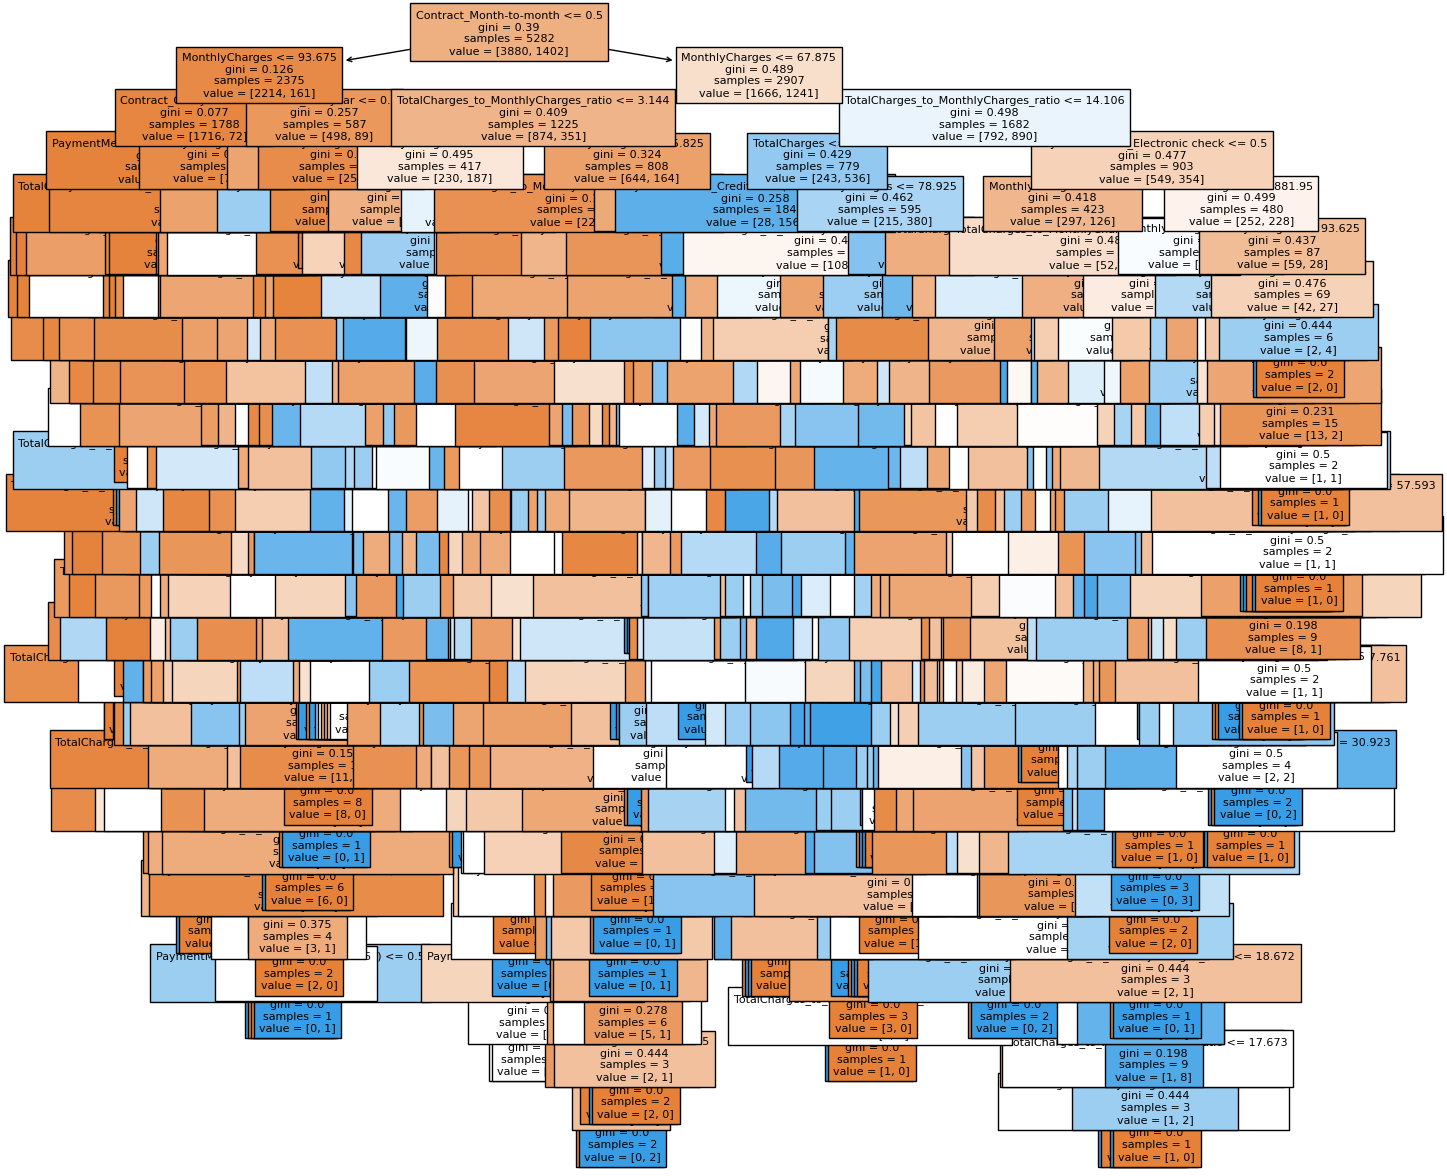

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Fit a decision tree
tree = DecisionTreeClassifier()  # You can change max_depth for model improvement
tree.fit(x_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 15))
plot_tree(tree, fontsize = 8, feature_names=features.columns.tolist(), filled = True)
plt.show()


Using the decision tree is similar to logistic regression in sklearn - we create the class, then use the fit method. It has the same score method (and other methods like predict).

In [11]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.993563044301401
0.7336740488358887


In [ ]:
We can see the accuracy on the train set is perfect is 99%, but the test score is much lower at 73.3%. This is a classic sign of overfitting. We can see how deep the tree is and plot it like so:

In [24]:
tree.get_depth()

27

In [30]:
dt = DecisionTreeClassifier(max_depth=20)
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.9848542218856494
0.7228847245883021


In [31]:
dt = DecisionTreeClassifier(max_depth=12)
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.8954941310109807
0.7558205565019875


In [36]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.7942067398712609
0.7842135150482681


The plot shows us the nodes of the tree - the root node is at the top and leaf nodes are at the bottom. The color is blue for mostly class 1 and orange for mostly class 0. We can see most of the leaf nodes end up with pure samples of one or the other class, and some of the leaves only have 1 sample in them.

Seeing how deep the tree got and the number of samples in the leaf nodes is helpful. We can restrict the number of levels of splits with max_depth. You can try a few values below and see how it changes. Here, we settled on 4 since that results in nearly equal train/test scores and looks like it eliminates the overfitting.

Plot the correlations between features and targets

<Axes: >

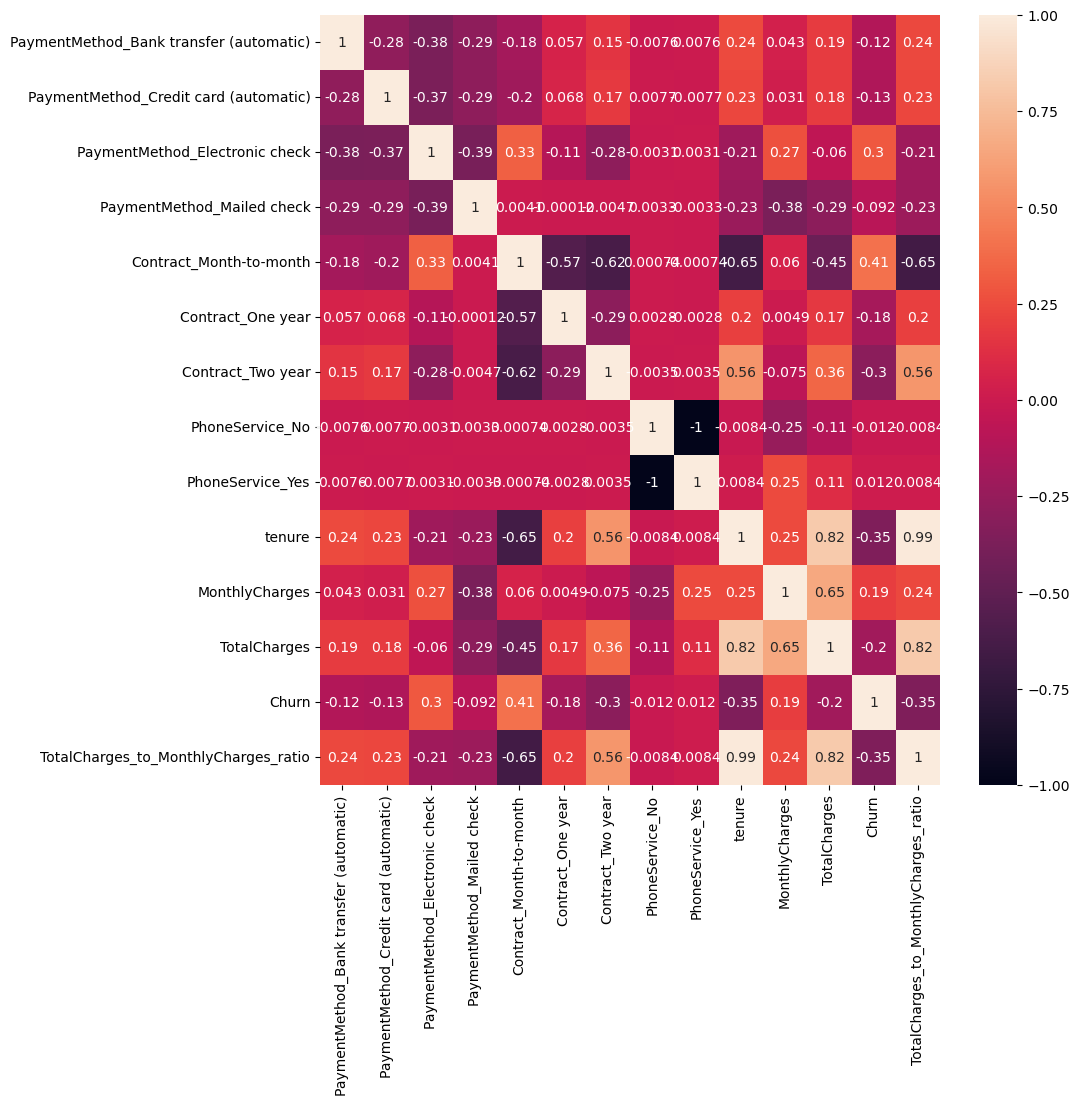

In [40]:
f = plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

In [42]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


Random forests offer several improvements over decision trees:

1. Utilization of Multiple Decision Trees: Instead of relying on a single decision tree, random forests employ an ensemble of decision trees, each trained on a different subset of the data.

2. Bootstrap Aggregating (Bagging): Random forests employ a technique called bootstrap sampling, where each decision tree is trained on a random sample of the data, often with replacement. This helps introduce diversity among the trees.

3. Feature Subset Sampling: At each split in the decision tree, only a random subset of features is considered. This further diversifies the trees and prevents them from relying too heavily on any single feature.

By leveraging these techniques, random forests aim to reduce both bias and variance compared to individual decision trees. This is particularly beneficial in scenarios where decision trees tend to overfit the training data, leading to high variance. In practice, implementing random forests with scikit-learn is straightforward.

0.7998864066641423
0.7915956842703009


<Axes: title={'center': 'Feature Importance'}>

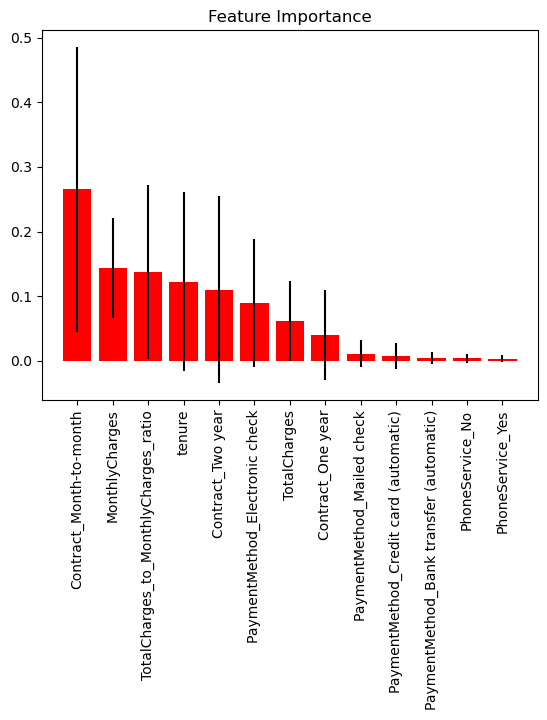

In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=5, random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

from scikitplot.estimators import plot_feature_importances

plot_feature_importances(rfc, feature_names=features.columns, x_tick_rotation=90)

Feature importances are useful for identifying which features have the most impact on predicting the target variable. They're calculated by tree-based methods like decision trees and random forests. These methods assess how well each feature separates the classes by measuring improvements in metrics like Gini index or entropy. Features with higher importances are better at distinguishing between classes.

In [ ]:
We can see here that contract month to month to be the most important variable, with a sharp dropoff in importance after that. We can remove some of the less-important features and see how that changes performance and the feature importance.

In [49]:
new_features = features.drop(['PhoneService_Yes', 'PhoneService_No', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(new_features, targets, stratify=targets, random_state=42)

In [54]:
rfc = RandomForestClassifier(max_depth=5, max_features=7, random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.808595229079894
0.7932992617830777


<Axes: title={'center': 'Feature Importance'}>

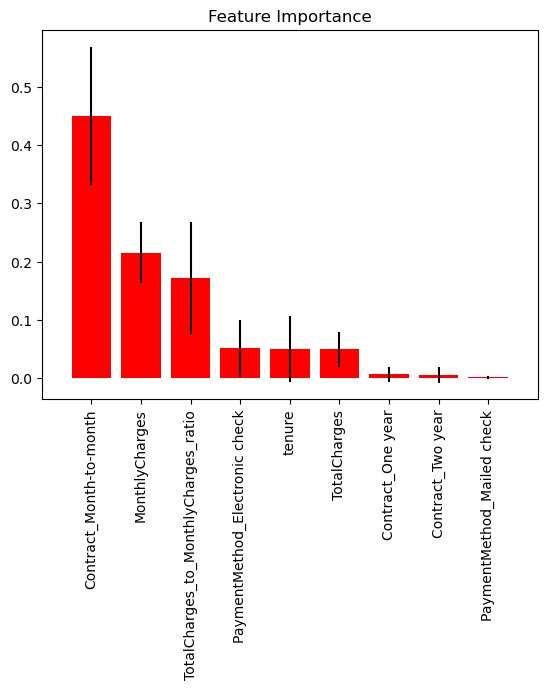

In [55]:
plot_feature_importances(rfc, feature_names=new_features.columns, x_tick_rotation=90)

Our model's performance didn't change significantly, but the importance of features did. 

These feature importance methods also serve as excellent exploratory data analysis (EDA). Whether we're exploring relationships between variables or predicting a target variable with non-linear relationships, decision tree or random forest feature importances provide valuable insights.

Here's a detailed summary of all the steps we've taken and what we achieved:

### Step 1: Data Preparation
- Loaded the dataset.
- Split the data into features (X) and the target variable (y).
- Split the data into training and testing sets.

### Step 2: Decision Tree Modeling
- Encoded categorical variables into numeric values using LabelEncoder.
- Fit a decision tree classifier to the training data.
- Plotted the decision tree to visualize how it makes decisions.

### Step 3: Correlation Analysis
- Calculated the correlation between features and the target variable (Churn).
- Plotted the correlations to identify which features are most strongly associated with churn.

### Step 4: Random Forest Modeling
- Fit a random forest classifier to the training data.
- Plotted the feature importances to understand which features have the most significant impact on predicting churn.

### Step 5: Feature Selection
- Identified less-important features based on feature importances and correlations.
- Removed less-important features from the model.
- Refit the random forest model using the reduced set of features.

### Step 6: Analysis
- The decision tree helped us visualize the decision-making process, showing the most critical features for predicting churn.
- Correlation analysis provided insights into the relationships between features and churn, guiding feature selection.
- Random forest modeling confirmed the importance of features and provided a more robust predictive model.
- Feature selection helped simplify the model without sacrificing predictive accuracy by removing less-important features.
- Overall, the analysis indicated that customers with certain contract types, payment methods, and higher tenure are more likely to churn. This information could be valuable for the company to focus on retaining these customers through targeted strategies or promotions.

By following these steps, we gained insights into the factors influencing customer churn and built a predictive model to identify customers at risk of churn, enabling proactive retention efforts.